<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/HW7_PH4200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasks:

1.  From sklearn load the Boston housing dataset. Study the data: look at few rows,run some statistics, and do pair plots of the house prices versus each of the features.Separate the data into training and test sets. Use linear regression, a decision tree,and random forest to study this set. Find the mean absolute error and the mean squareerror for each methos when applied to the test set.
2. Read the file 'bank_note_authentication.txt' (it is a csv file) into a pandas dataframe.Check the UCI repository for a description of the features. Add the features as column namesin the dataframe. Split the data into train and test sets. Apply logistic regression to the set.How well does it do on the test set? Try KNN. What is the best value for k?Then try descision trees. Tune the hyperparameters to get the best results.Repeat with random forest.
3.  Repeat problem 2 for the winequality-white.csv file, treating the problem as amulticlassification one. Next, treat it as a regression problem and repeat the stepsin problem 1.



In [0]:
#get the code we need

import numpy as np   #matrix/array
import pandas as pd  #Data analysis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Task 1:
1. From sklearn load the Boston housing dataset. 
2. Study the data: 
* look at few rows, run some statistics, and do pair plots of the house prices versus each of the features.
* Separate the data into training and test sets. 
* Use linear regression, a decision tree, and random forest to study this set.
* Find the mean absolute error and the mean squared error for each method when applied to the test set.


In [0]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [0]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


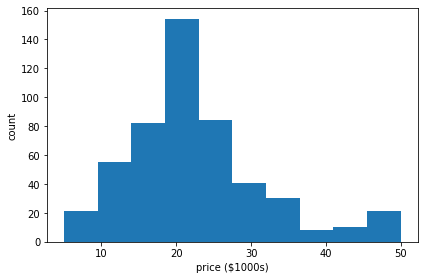

In [0]:
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [0]:
#let's dome statistics 
header_l =[]
for i in df:
  header_l.append(i)

for h in header_l:
  print('mean value for ', h, np.mean(df[h]),'\t', 'std value for ', h, np.std(df[h]) )

mean value for  CRIM 3.6135235573122535 	 std value for  CRIM 8.593041351295769
mean value for  ZN 11.363636363636363 	 std value for  ZN 23.299395694766027
mean value for  INDUS 11.136778656126504 	 std value for  INDUS 6.853570583390873
mean value for  CHAS 0.0691699604743083 	 std value for  CHAS 0.25374293496034855
mean value for  NOX 0.5546950592885372 	 std value for  NOX 0.11576311540656153
mean value for  RM 6.284634387351787 	 std value for  RM 0.7019225143345692
mean value for  AGE 68.57490118577078 	 std value for  AGE 28.121032570236885
mean value for  DIS 3.795042687747034 	 std value for  DIS 2.103628356344459
mean value for  RAD 9.549407114624506 	 std value for  RAD 8.698651117790645
mean value for  TAX 408.2371541501976 	 std value for  TAX 168.3704950393814
mean value for  PTRATIO 18.455533596837967 	 std value for  PTRATIO 2.162805191482142
mean value for  B 356.67403162055257 	 std value for  B 91.20460745217272
mean value for  LSTAT 12.653063241106723 	 std value f

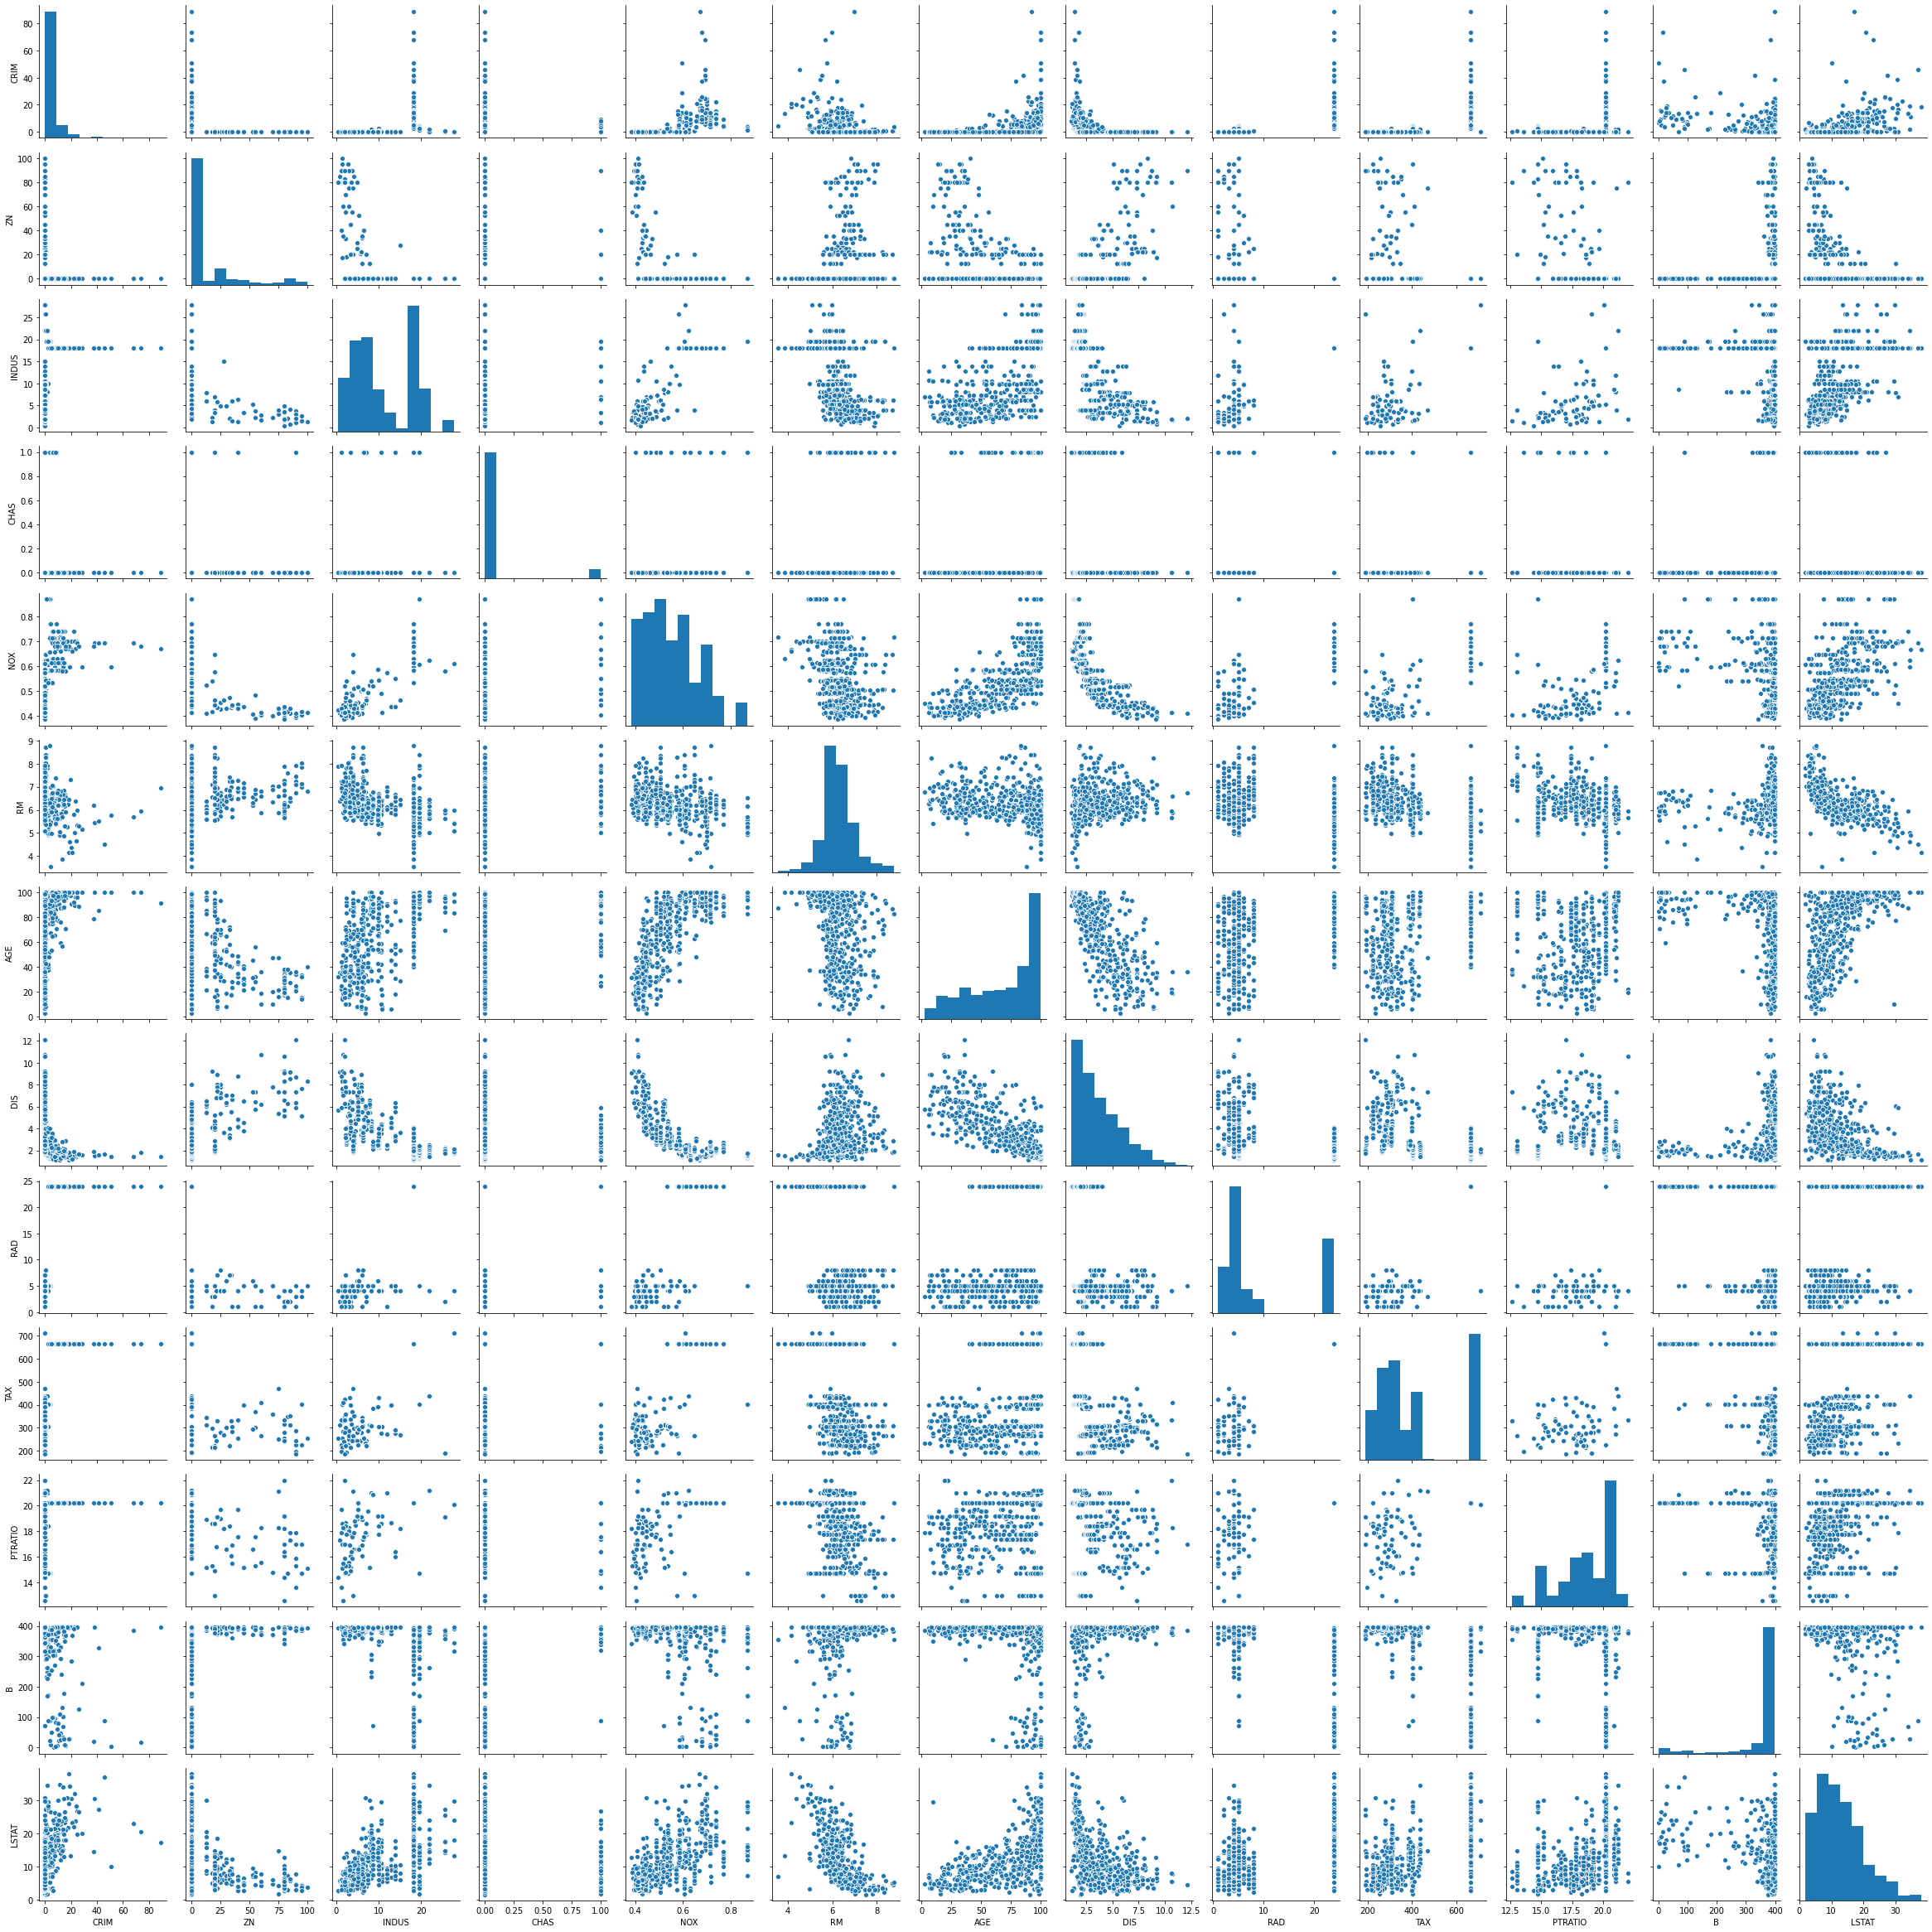

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(df, height=2.5)
plt.tight_layout()

Text(24.125, 0.5, 'TAX')

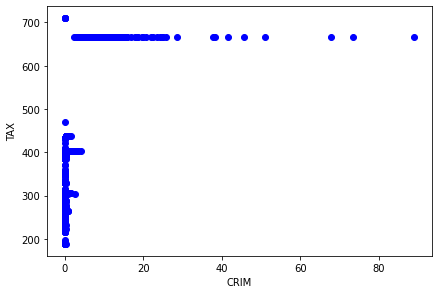

In [0]:
#do pair plots of the house prices versus each of the features

plt.scatter(df['CRIM'].values, df['TAX'].values, color='b')
plt.tight_layout()
plt.xlabel('CRIM')
plt.ylabel('TAX')

Text(30.25, 0.5, 'DIS')

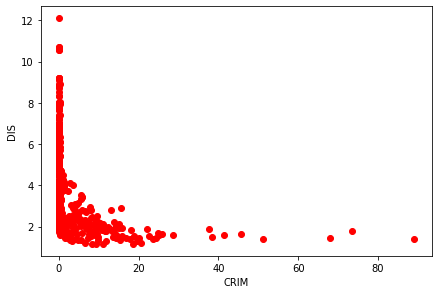

In [0]:
plt.scatter(df['CRIM'].values, df['DIS'].values, c='r')
plt.tight_layout()
plt.xlabel('CRIM')
plt.ylabel('DIS')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

###Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
import graphviz

In [0]:
m_lr = LinearRegression()
#I am following sklearn tutorial

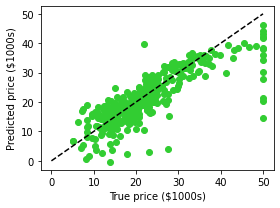

In [0]:
m_lr.fit(X_train, y_train)
pred = m_lr.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, pred, color='limegreen')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [0]:
print("RMS: ",metrics.mean_absolute_error(pred, expected))

RMS:  3.4884213538696995


In [0]:
print(m_lr.intercept_)
print(m_lr.coef_)

21.623061558299607
[-1.01452009e-01  4.06799912e-02 -2.00216562e-03  2.77028112e+00
 -1.20433754e+01  6.21945080e+00 -5.55348375e-02 -1.33418317e+00
  3.64127210e-01 -1.92140257e-02 -9.53218858e-01  3.80114267e-03
 -2.38314747e-01]


### Decision Tree

In [0]:
y_b_dt = df.values[:,-1]
X_b_dt = df.values[:,:-1]

X_bdt_train, X_bdt_test, y_bdt_train, y_bdt_test = train_test_split(X_b_dt, y_b_dt, random_state=1)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

treereg = DecisionTreeRegressor()
treereg.fit(X_bdt_train,y_bdt_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred = treereg.predict(X_bdt_test)
print("RMS: ", metrics.mean_absolute_error(y_bdt_test, y_pred))

RMS:  3.656377952755906


### Random Forest

In [0]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)
print("RMS: ", metrics.mean_absolute_error(y_test, y_pred))

RMS:  2.948461728395063


##Task 2:
1. Read the file 'bank_note_authentication.txt' (it is a csv file) into a pandas dataframe.
2. Check the UCI repository for a description of the features. 
3. Add the features as column names in the dataframe. 
4. Split the data into train and test sets. 
5. Apply logistic regression to the set. How well does it do on the test set?
6. Try KNN. What is the best value for k? 
7. Then try decision trees. Tune the hyperparameters to get the best results.Repeat with random forest.

##What the features mean:

Attribute Information 

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

Class (target). Presumably 1 for genuine and 2 for forged

In [0]:
bank_data = pd.read_csv('data_banknote_authentication.txt',header=None)

bank_data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [0]:
bank_data.columns = ['Variance of Wavelet Transformed image',
                     'Skewness of Wavelet Transformed image', 
                     'Curtosis of Wavelet Transformed image',
                     'Entropy of image',
                     'Class']

bank_data

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [0]:
y_bank = bank_data.values[:,-1]
X_bank = bank_data.values[:,:-1]

In [0]:
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=.4)

In [0]:
#apply logistic regression

linreg = LinearRegression()
linreg.fit(X_bank_train, y_bank_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = linreg.predict(X_bank_test)

In [0]:
metrics.mean_absolute_error(y_bank_test, y_predict)

0.1329790982732597

In [0]:
np.sqrt(metrics.mean_squared_error(y_bank_test, y_predict))

0.17592414256580408

In [0]:
from sklearn.neighbors import KNeighborsClassifier

k_range = np.arange(1,201,1)
acc = []

for i in k_range:
  #cancer first
  curr_kn = KNeighborsClassifier(n_neighbors=i)
  curr_kn.fit(X_bank_train, y_bank_train)
  curr_predict = curr_kn.predict(X_bank_test)

  curr_accuracy = metrics.accuracy_score(y_bank_test, curr_predict)
  acc.append(curr_accuracy)


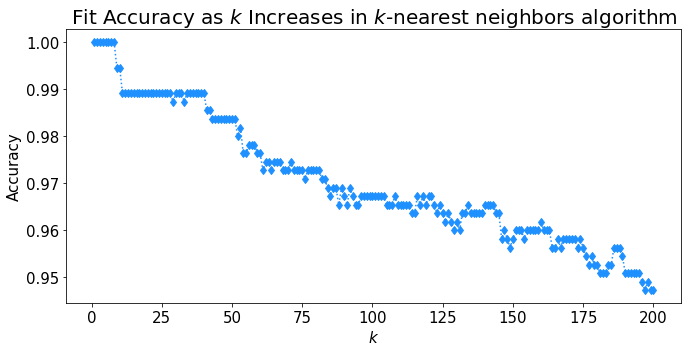

In [0]:
#Make a plot of the training and testing accuracy as a function of k.
plt.figure(figsize=(10,5))
plt.plot(k_range, acc, marker='d', color='dodgerblue', linestyle=':', label='Cancer Data')

plt.xlabel(r'$k$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title(r'Fit Accuracy as $k$ Increases in $k$-nearest neighbors algorithm', fontsize=20)

plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

In [0]:
mlp = RandomForestRegressor(criterion='mae', max_depth=7, n_estimators=100, random_state=1)

In [0]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.1],
    'learning_rate': ['constant','adaptive']
    }

In [0]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

In [0]:
mlp.fit(X_bank_train, y_bank_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [0]:
y_bank_pred = mlp.predict(X_bank_test)
metrics.mean_absolute_error(y_bank_test, y_bank_pred)

0.04863387978142077

In [0]:
treereg = DecisionTreeRegressor(criterion='mae', max_depth=5)
treereg.fit(X_bank_train, y_bank_train)
y_pred = treereg.predict(X_bank_test)
metrics.mean_absolute_error(y_bank_test, y_pred)

0.060109289617486336

##Task 3:
1. Repeat problem 2 for the winequality-white.csv file, treating the problem as a multiclassification one. 
2. Next, treat it as a regression problem and repeat the steps in problem 1.

##Attributes Description

For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Output variable (based on sensory data): 
12. quality (score between 0 and 10)



In [0]:
columns = ["facidity", "vacidity", "citric", "sugar", "chlorides", "fsulfur", 
               "tsulfur", "density", "pH", "sulphates", "alcohol", "quality"]

In [0]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                         names=columns, sep=";", skiprows=1)

In [0]:
white

,facidity,vacidity,citric,sugar,chlorides,fsulfur,tsulfur,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [0]:
y_wine = white.values[:,-1]
X_wine = white.values[:,:-1]

In [0]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=.4)

In [0]:
#logistic regression problem first

linreg = LinearRegression()
linreg.fit(X_wine_train, y_wine_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_wine_predict = linreg.predict(X_wine_test)

In [0]:
metrics.mean_absolute_error(y_wine_predict, y_wine_test)

0.5926164176750669